# **Chicago Crime Time Series**

_John Andrew Dixon_

---

##### **Imports**

In [2]:
import glob
import matplotlib.pyplot as plt
import matplotlib.ticker as mticks
import pandas as pd
import seaborn as sns

##### **Data Load**

In [3]:
# Get the list of crime files from "./Data/Chicago/"
crime_files = sorted(glob.glob("./Data/Chicago/*.csv"))
# Create one DataFrame from all the files
original_df = pd.concat([pd.read_csv(crime_file) for crime_file in crime_files])
# Add a full crime description
original_df["Full Crime"] = original_df["Primary Type"] + " " + original_df["Description"]
# Verify it worked
original_df

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude,Full Crime
0,1310288,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,621,6.0,NaN,41.756650,-87.641608,CRIMINAL DAMAGE TO PROPERTY
1,1311626,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,1033,10.0,NaN,41.848786,-87.704087,CRIMINAL DAMAGE TO VEHICLE
2,1310824,01/01/2001 01:00:00 AM,THEFT,$500 AND UNDER,BAR OR TAVERN,False,False,323,3.0,NaN,41.765484,-87.621836,THEFT $500 AND UNDER
3,6154338,01/01/2001 01:00:00 PM,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False,831,8.0,15.0,41.774819,-87.702896,THEFT FINANCIAL ID THEFT: OVER $300
4,3206463,01/01/2001 01:00:00 AM,CRIM SEXUAL ASSAULT,PREDATORY,RESIDENCE,False,True,835,8.0,18.0,41.735507,-87.690095,CRIM SEXUAL ASSAULT PREDATORY
...,...,...,...,...,...,...,...,...,...,...,...,...,...
100405,13091787,05/30/2023 12:48:00 PM,THEFT,RETAIL THEFT,DRUG STORE,False,False,1733,17.0,33.0,41.953925,-87.707307,THEFT RETAIL THEFT
100406,13090302,05/30/2023 12:50:00 PM,CRIMINAL DAMAGE,TO VEHICLE,RESIDENCE,False,False,522,5.0,9.0,41.677237,-87.623871,CRIMINAL DAMAGE TO VEHICLE
100407,13089754,05/30/2023 12:52:00 AM,CRIMINAL DAMAGE,TO PROPERTY,CONVENIENCE STORE,False,False,2511,25.0,36.0,41.938194,-87.793558,CRIMINAL DAMAGE TO PROPERTY
100408,13090346,05/30/2023 12:55:00 PM,THEFT,RETAIL THEFT,DEPARTMENT STORE,True,False,1913,19.0,46.0,41.963071,-87.655984,THEFT RETAIL THEFT


In [4]:
# Specify the datetime format
date_format = "%m/%d/%Y %I:%M:%S %p"
# Creat the Datetime column and make the date column into a datetime column
original_df["Datetime"] = pd.to_datetime(original_df["Date"], format=date_format)
# Change the index of the DataFrame to the Date
original_df = original_df.set_index("Datetime")

---

## **Stakeholder Questions**

### **Comparing Police Districts:**

#### _Which district has the most crimes? Which has the least?_

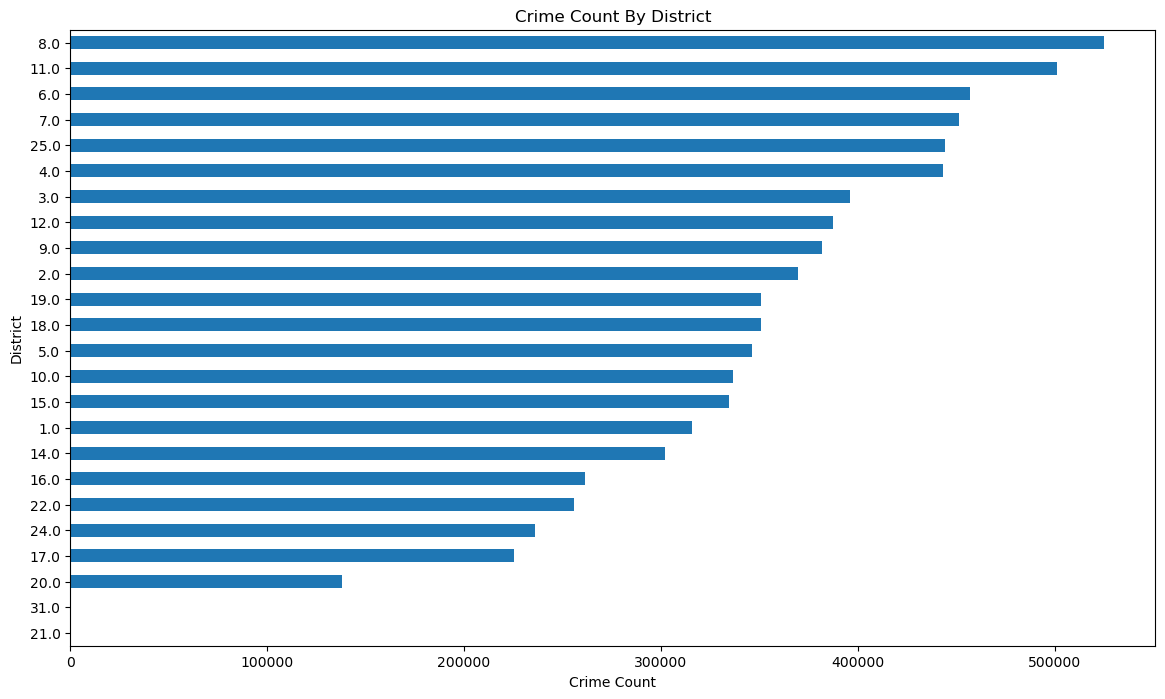

In [5]:
ax = original_df["District"].value_counts().sort_values().plot(kind="barh", figsize=(14, 8))
ax.set_title("Crime Count By District")
ax.set_xlabel("Crime Count")
ax.set_ylabel("District");

District 8 has, undoubtedly, the most amount of crime. But, it's harder to find the district with the least amount of crime since. Because district 21, according to our data, has the least amount of crime but according to the websites below, there is no district 21 (since it is not listed anywhere):
- https://gis.chicagopolice.org/pages/cpd-pdf-maps
- https://data.cityofchicago.org/Public-Safety/Boundaries-Police-Districts-current-/fthy-xz3r
- https://www.chicago.gov/city/en/depts/cpd.html

Going further, by analyzing the crimes located in district 21 from the data we can see something odd about these crimes:

In [6]:
original_df.loc[original_df["District"] == 21, :]

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude,Full Crime
Datetime,,,,,,,,,,,,,
2003-07-20 00:05:00,2841856,07/20/2003 12:05:00 AM,THEFT,FROM BUILDING,OTHER,False,False,2112,21.0,3.0,41.837901,-87.621915,THEFT FROM BUILDING
2004-02-18 18:15:00,3184687,02/18/2004 06:15:00 PM,BATTERY,AGGRAVATED:KNIFE/CUTTING INSTR,SIDEWALK,False,False,2112,21.0,3.0,41.837901,-87.621915,BATTERY AGGRAVATED:KNIFE/CUTTING INSTR
2004-07-04 15:45:48,3425216,07/04/2004 03:45:48 PM,NARCOTICS,POSS: HEROIN(WHITE),STREET,True,False,2112,21.0,3.0,41.837901,-87.621915,NARCOTICS POSS: HEROIN(WHITE)
2004-08-01 20:05:00,3465922,08/01/2004 08:05:00 PM,BATTERY,DOMESTIC BATTERY SIMPLE,VEHICLE NON-COMMERCIAL,True,True,2112,21.0,3.0,41.837901,-87.621915,BATTERY DOMESTIC BATTERY SIMPLE


There are only 4 total crimes in this supposed district and all happen within 13 months of each other. None happen before 07/2003 or after 08/2004. There are no updates at all. So, I will say that district 21 can be ignored since it is possibly erroneous. 

District 31 is the next district that has the least amount of crimes. We'll check it for oddities too since it seems to have a small amount of crime compared to the other districts in the plot above. Notably, we'll be searching for recent crimes to prove to us that this district actually exists:

In [7]:
original_df.loc[original_df["District"] == 31, :]

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude,Full Crime
Datetime,,,,,,,,,,,,,
2002-01-25 17:17:00,1999690,01/25/2002 05:17:00 PM,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False,1621,31.0,NaN,42.007037,-87.761712,OTHER OFFENSE HARASSMENT BY TELEPHONE
2002-03-02 01:00:00,2013371,03/02/2002 01:00:00 AM,THEFT,OVER $500,BAR OR TAVERN,False,False,533,31.0,NaN,41.646187,-87.617227,THEFT OVER $500
2002-03-06 19:30:00,2019929,03/06/2002 07:30:00 PM,BURGLARY,FORCIBLE ENTRY,FACTORY/MANUFACTURING BUILDING,False,False,1651,31.0,NaN,41.973534,-87.866809,BURGLARY FORCIBLE ENTRY
2002-04-04 13:00:00,2064064,04/04/2002 01:00:00 PM,THEFT,$500 AND UNDER,SIDEWALK,False,False,533,31.0,NaN,41.646187,-87.617227,THEFT $500 AND UNDER
2002-04-05 09:00:00,2066054,04/05/2002 09:00:00 AM,THEFT,$500 AND UNDER,STREET,False,False,1611,31.0,NaN,42.000241,-87.799527,THEFT $500 AND UNDER
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-11 17:00:00,12956274,01/11/2023 05:00:00 PM,MOTOR VEHICLE THEFT,AUTOMOBILE,GAS STATION,False,False,1654,31.0,41.0,42.003002,-87.894202,MOTOR VEHICLE THEFT AUTOMOBILE
2023-01-11 10:50:00,12950142,01/11/2023 10:50:00 AM,ASSAULT,SIMPLE,COMMERCIAL / BUSINESS OFFICE,False,False,1654,31.0,41.0,42.008962,-87.906491,ASSAULT SIMPLE
2023-02-07 17:30:00,13077041,02/07/2023 05:30:00 PM,BATTERY,SIMPLE,COMMERCIAL / BUSINESS OFFICE,False,False,1654,31.0,41.0,42.008962,-87.906473,BATTERY SIMPLE


The crimes that happened within this district range from 2002 to 2023. Based on this, I conclude that this district is real and thus has the least amount of crime.

> **Result**:
> - District 8: Has the most crime.
> - District 31: Has the least crime.
>
> _**Note:** Based upon comparing maps, I believe the crimes in district 21 happened in district 2 based on the latitude and longitude given. But, this is just conjecture._

### **Crimes Across the Years:**

#### _Is the total number of crimes increasing or decreasing across the years?_

> _**Note**: For this part, I will exclude 2023 since the year hasn't ended yet and it can potentially skew the data._

In [117]:
# Make a copy of the original dataframe
year_df = original_df.copy()
# Add a year column to it for easy binning
year_df["Year"] = year_df.index.year
# Verify it worked
year_df.head()

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude,Full Crime,Year
Datetime,,,,,,,,,,,,,,
2001-01-01 01:00:00,1310288,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,621,6.0,NaN,41.756650,-87.641608,CRIMINAL DAMAGE TO PROPERTY,2001
2001-01-01 01:00:00,1311626,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,1033,10.0,NaN,41.848786,-87.704087,CRIMINAL DAMAGE TO VEHICLE,2001
2001-01-01 01:00:00,1310824,01/01/2001 01:00:00 AM,THEFT,$500 AND UNDER,BAR OR TAVERN,False,False,323,3.0,NaN,41.765484,-87.621836,THEFT $500 AND UNDER,2001
2001-01-01 13:00:00,6154338,01/01/2001 01:00:00 PM,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False,831,8.0,15.0,41.774819,-87.702896,THEFT FINANCIAL ID THEFT: OVER $300,2001
2001-01-01 01:00:00,3206463,01/01/2001 01:00:00 AM,CRIM SEXUAL ASSAULT,PREDATORY,RESIDENCE,False,True,835,8.0,18.0,41.735507,-87.690095,CRIM SEXUAL ASSAULT PREDATORY,2001


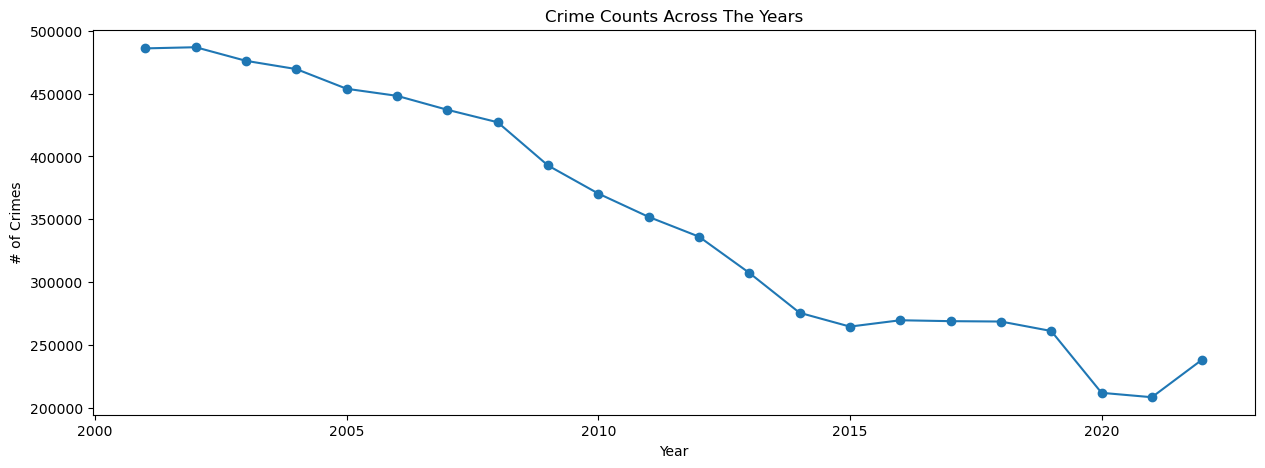

In [118]:
ax = year_df["Year"].value_counts().sort_index().iloc[:-1].plot(style='o-', 
                                                                title="Crime Counts Across The Years", 
                                                                ylabel='# of Crimes', 
                                                                xlabel='Year', 
                                                                figsize=(15, 5));

> Result:
> - Across the years crime counts are generally decreasing.

#### _Are there any individual crimes that are doing the opposite (e.g decreasing when overall crime is increasing or vice-versa)?_


In [120]:
# Get the crimes by year
crimes_by_year = year_df.groupby("Year")["Primary Type"].value_counts()
# Unstack the first level for easier access
crimes_by_year = pd.DataFrame(crimes_by_year).unstack(level = 0).T
# Replace the index with the years for easier access
crimes_by_year.set_index(crimes_by_year.index.get_level_values(1), inplace=True)
# Fill all NaNs with 0
crimes_by_year.fillna(0, inplace=True)
# Verify
crimes_by_year.head()

Primary Type,ARSON,ASSAULT,BATTERY,BURGLARY,CONCEALED CARRY LICENSE VIOLATION,CRIM SEXUAL ASSAULT,CRIMINAL DAMAGE,CRIMINAL SEXUAL ASSAULT,CRIMINAL TRESPASS,DECEPTIVE PRACTICE,...,OTHER OFFENSE,PROSTITUTION,PUBLIC INDECENCY,PUBLIC PEACE VIOLATION,RITUALISM,ROBBERY,SEX OFFENSE,STALKING,THEFT,WEAPONS VIOLATION
Year,,,,,,,,,,,,,,,,,,,,,
2001,1011.0,31384.0,93460.0,26014.0,1.0,1779.0,55858.0,30.0,13241.0,14946.0,...,29663.0,6026.0,9.0,2750.0,8.0,18441.0,2239.0,204.0,99277.0,4277.0
2002,1032.0,31523.0,94153.0,25623.0,0.0,1807.0,55941.0,27.0,13880.0,13731.0,...,32600.0,6408.0,8.0,2457.0,2.0,18523.0,2173.0,200.0,98332.0,4281.0
2003,955.0,29477.0,88379.0,25157.0,0.0,1571.0,55011.0,40.0,14807.0,13459.0,...,31147.0,6214.0,6.0,2430.0,2.0,17332.0,2078.0,247.0,98876.0,4211.0
2004,778.0,28850.0,87136.0,24564.0,0.0,1539.0,53164.0,40.0,15913.0,13255.0,...,29532.0,7476.0,9.0,2495.0,1.0,15978.0,1805.0,215.0,95463.0,4298.0
2005,691.0,27067.0,83964.0,25503.0,0.0,1522.0,54548.0,36.0,16655.0,13590.0,...,28028.0,6124.0,4.0,2730.0,2.0,16047.0,1816.0,192.0,85684.0,4106.0


In [126]:
(crimes_by_year.loc[2022] - crimes_by_year.loc[2001]).iloc[:-1]

Primary Type
ARSON                                 -589.0
ASSAULT                             -10597.0
BATTERY                             -52570.0
BURGLARY                            -18422.0
CONCEALED CARRY LICENSE VIOLATION      176.0
CRIM SEXUAL ASSAULT                  -1779.0
CRIMINAL DAMAGE                     -28619.0
CRIMINAL SEXUAL ASSAULT               1516.0
CRIMINAL TRESPASS                    -9020.0
DECEPTIVE PRACTICE                    1261.0
DOMESTIC VIOLENCE                       -1.0
GAMBLING                              -925.0
HOMICIDE                                57.0
HUMAN TRAFFICKING                       18.0
INTERFERENCE WITH PUBLIC OFFICER       -14.0
INTIMIDATION                           -98.0
KIDNAPPING                            -817.0
LIQUOR LAW VIOLATION                 -1434.0
MOTOR VEHICLE THEFT                  -6107.0
NARCOTICS                           -45851.0
NON - CRIMINAL                           0.0
NON-CRIMINAL                             5

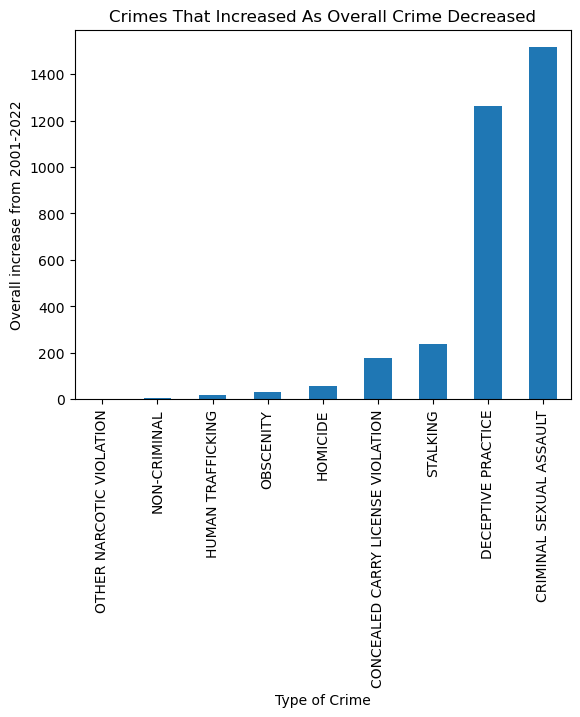

In [139]:
change_in_crime = (crimes_by_year.loc[2022] - crimes_by_year.loc[2001]).iloc[:-1].sort_values(ascending=True)
change_in_crime.loc[change_in_crime > 0].plot(kind="bar",
                                              title="Crimes That Increased As Overall Crime Decreased",
                                              xlabel="Type of Crime",
                                              ylabel="Overall increase from 2001-2022");

> Result:
> - Only 9 out of 36 crimes are increasing while overall crime is decreasing. See the above plot for details.

### **Comparing AM vs. PM Rush Hour:**

#### _Are crimes more common during AM rush hour or PM rush hour?_

In [112]:
# Filter crimes based on time. The following helped me do this:
# https://pub.towardsai.net/how-to-filter-pandas-dataframe-by-time-81509d3adee9
# The other way to do this would be to use the following as filters:
# AM -> ((original_df.index.hour >= 7) & (original_df.index.hour <= 9)) | ((original_df.index.hour == 10) & (original_df.index.minute == 0) & (original_df.index.second == 0))
# PM -> ((original_df.index.hour >= 16) & (original_df.index.hour <= 18)) | ((original_df.index.hour == 19) & (original_df.index.minute == 0) & (original_df.index.second == 0))
# It gives the same result but is way, way uglier so I searched the web and found the above article
am_rush_df = original_df.copy().between_time("07:00", "10:00")
pm_rush_df = original_df.copy().between_time("16:00", "19:00")
am_rush_df.loc[:, "Rush Hour"] = "AM"
pm_rush_df.loc[:, "Rush Hour"] = "PM"
display(am_rush_df.info())
pm_rush_df.info()

# Combine the AM/PM rush hour DataFrames into one
am_pm_rush_df = pd.concat([am_rush_df, pm_rush_df])
am_pm_rush_df

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 897887 entries, 2001-01-01 07:00:00 to 2023-05-30 10:00:00
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    897887 non-null  int64  
 1   Date                  897887 non-null  object 
 2   Primary Type          897887 non-null  object 
 3   Description           897887 non-null  object 
 4   Location Description  896117 non-null  object 
 5   Arrest                897887 non-null  bool   
 6   Domestic              897887 non-null  bool   
 7   Beat                  897887 non-null  int64  
 8   District              897885 non-null  float64
 9   Ward                  833013 non-null  float64
 10  Latitude              882738 non-null  float64
 11  Longitude             882738 non-null  float64
 12  Full Crime            897887 non-null  object 
 13  Rush Hour             897887 non-null  object 
dtypes: bool(2), float6

None

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1355665 entries, 2001-01-01 16:00:00 to 2023-05-30 19:00:00
Data columns (total 14 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   ID                    1355665 non-null  int64  
 1   Date                  1355665 non-null  object 
 2   Primary Type          1355665 non-null  object 
 3   Description           1355665 non-null  object 
 4   Location Description  1353996 non-null  object 
 5   Arrest                1355665 non-null  bool   
 6   Domestic              1355665 non-null  bool   
 7   Beat                  1355665 non-null  int64  
 8   District              1355657 non-null  float64
 9   Ward                  1245339 non-null  float64
 10  Latitude              1344842 non-null  float64
 11  Longitude             1344842 non-null  float64
 12  Full Crime            1355665 non-null  object 
 13  Rush Hour             1355665 non-null  object 
dtypes

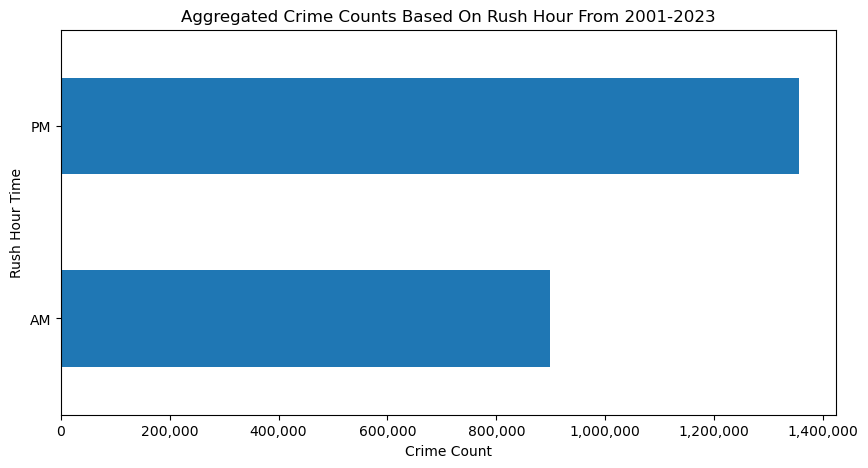

In [114]:
# Create the plot
ax = am_pm_rush_df["Rush Hour"].value_counts().sort_index().plot(kind="barh", figsize=(10, 5))

# Format the title and labels
ax.set_title("Aggregated Crime Counts Based On Rush Hour From 2001-2023")
ax.set_xlabel("Crime Count")
ax.set_ylabel("Rush Hour Time")

# Format the x-tick labels
crime_cnt_format = mticks.StrMethodFormatter("{x:,.0f}")
ax.xaxis.set_major_formatter(crime_cnt_format);

**Result:**
- Crimes are more common during the PM rush hour.

#### _What are the top 5 most common crimes during AM rush hour? What are the top 5 most common crimes during PM rush hour?_

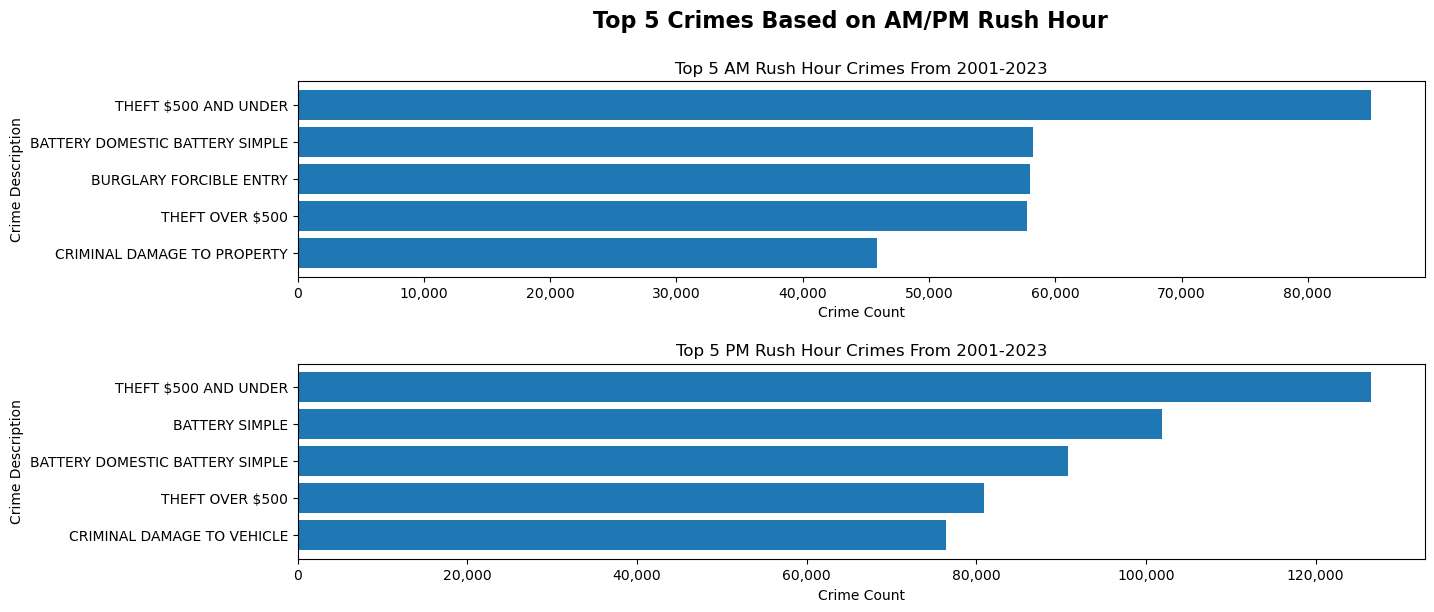

In [115]:
# Get the top 5 crimes for AM and PM rush hours
am = am_rush_df["Full Crime"].value_counts().sort_values(ascending=True).tail()
pm = pm_rush_df["Full Crime"].value_counts().sort_values(ascending=True).tail()
# Create a string formatted for axis ticks
crime_cnt_format = mticks.StrMethodFormatter("{x:,.0f}")

# Create the subplot layout
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12, 6))

# Fix the layout so it won't be so cramped
fig.tight_layout(h_pad=5)
plt.subplots_adjust(top=0.86)

# Create a super title for the plots
fig.suptitle("Top 5 Crimes Based on AM/PM Rush Hour", fontsize=16, fontweight="bold")

# Plot the AM bar subplot
ax[0].barh(am.index, am.values)
# Set the title and axes labels
ax[0].set_title("Top 5 AM Rush Hour Crimes From 2001-2023")
ax[0].set_xlabel("Crime Count")
ax[0].set_ylabel("Crime Description")
# Format the x-axis ticks
ax[0].xaxis.set_major_formatter(crime_cnt_format)

# Plot the PM bar subplot
ax[1].barh(pm.index, pm.values)
# Set the title and axes labels
ax[1].set_title("Top 5 PM Rush Hour Crimes From 2001-2023")
ax[1].set_xlabel("Crime Count")
ax[1].set_ylabel("Crime Description")
# Format the x-axis ticks
ax[1].xaxis.set_major_formatter(crime_cnt_format)

**Result:**
- See above. It is worth noting that the crimes in the AM rush hour are near the same as those in the PM rush hour. The differences are as such:
    - AM rush hour has `Burglary Forcible Entry` and `Criminal Damage To Property` whereas PM rush hour has `Battery Simple` and `Criminal Damage To Vehicle`.
    - There are differences in rank of crimes which can be readily seen above.

#### _Are Motor Vehicle Thefts more common during AM rush hour or PM Rush Hour?_

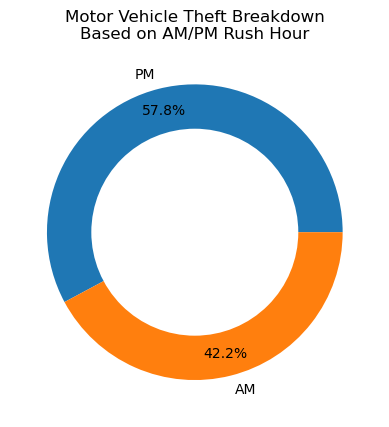

In [116]:
# Get rows for "MOTOR VEHICLE THEFT" crimes and only get the column that says whether the crime
# is AM or PM rush hour. Then, get the value counts for the donut chart below 
motor_vehice_theft_df = am_pm_rush_df.loc[am_pm_rush_df["Primary Type"] == "MOTOR VEHICLE THEFT", "Rush Hour"].value_counts()

# Plot the pie chart
plt.pie(motor_vehice_theft_df, labels=motor_vehice_theft_df.index, autopct='%1.1f%%', pctdistance=0.85)

# Create a white circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
# Get the current figure and save it as fig
fig = plt.gcf()
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle);

# Add a good title
plt.title('Motor Vehicle Theft Breakdown\nBased on AM/PM Rush Hour');

Result:
- Motor Vehicle Thefts more common during the PM rush hour than the AM Rush Hour.